**Introduction**

This task focuses on predicting whether a loan applicant is likely to default on a loan. By analyzing applicant data (like education, income, and loan amount), we can train a classification model to assist banks in making informed lending decisions.

**Dataset Description**

We'll use the Loan Prediction dataset, which contains information such as:

Gender, Married, Education

ApplicantIncome, CoapplicantIncome

LoanAmount, Loan_Amount_Term, Credit_History

Loan_Status (target: Y/N)



In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# Load Data
df = pd.read_csv('/kaggle/input/credit-risk-prediction/LOAN PREDICTION DATASET.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# 3. Inspect Dataset
print("Shape:", df.shape)
print(df.columns)
df.head()

Shape: (614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# 4. Handle Missing Values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


/tmp/ipykernel_13/2395259738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipykernel_13/2395259738.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [5]:
#  Feature Engineering
# Total Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Log Transform LoanAmount and TotalIncome
import numpy as np
df['LoanAmountLog'] = np.log1p(df['LoanAmount'])  # log1p is safer than log(0)
df['TotalIncomeLog'] = np.log1p(df['TotalIncome'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


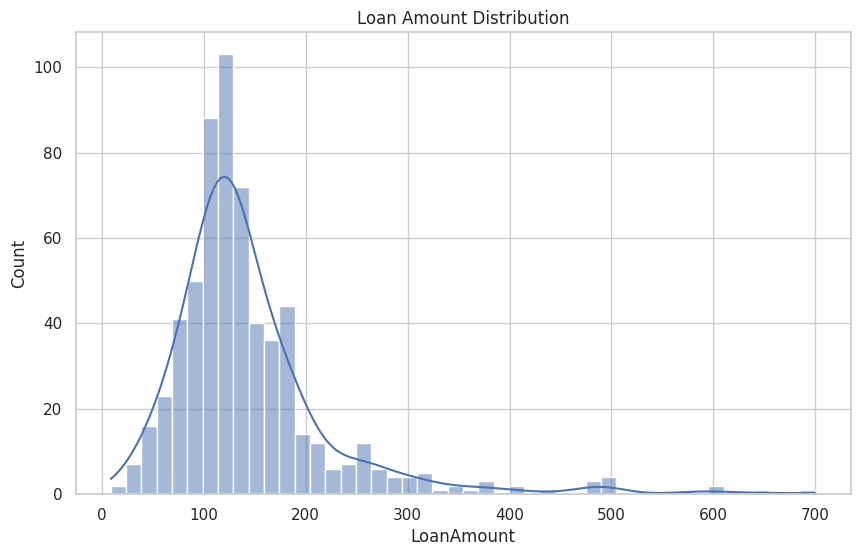

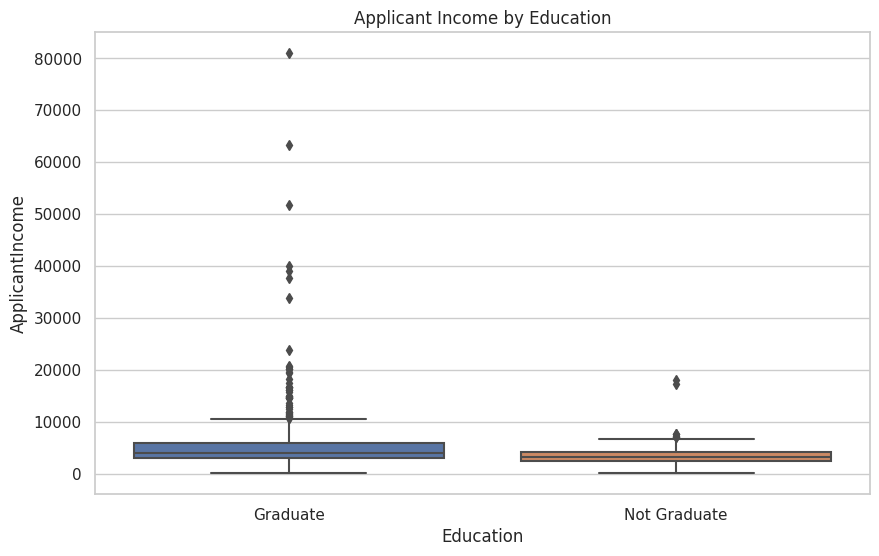

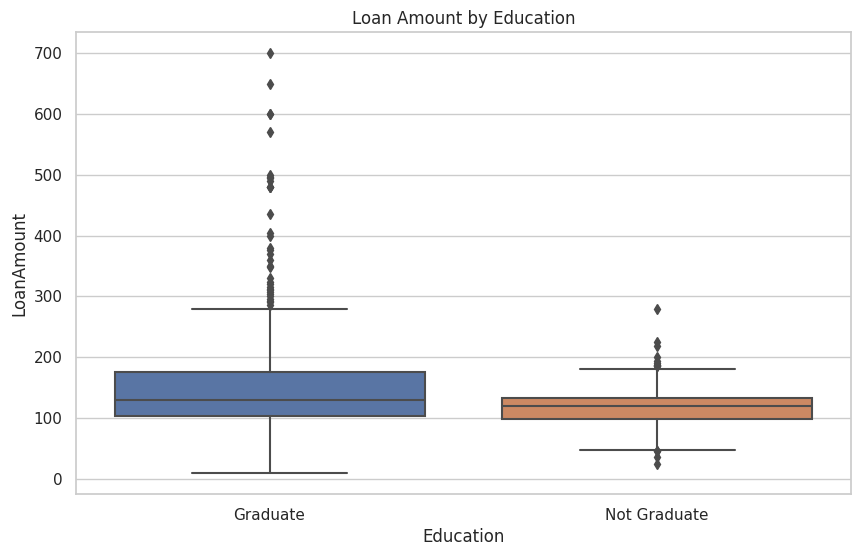

In [6]:
# 5. Visualize Key Features
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

sns.boxplot(data=df, x='Education', y='ApplicantIncome')
plt.title("Applicant Income by Education")
plt.show()

sns.boxplot(data=df, x='Education', y='LoanAmount')
plt.title("Loan Amount by Education")
plt.show()


In [7]:
# 6. Encode Categorical Features
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [8]:
# 7. Select Features & Target
X = df[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History',
        'Loan_Amount_Term', 'Property_Area', 'LoanAmountLog', 'TotalIncomeLog', 'Dependents']]
y = df['Loan_Status']

In [9]:
# 1. Train-test split (this should be BEFORE model.fit)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train) 

LogisticRegression(max_iter=200)

In [10]:
from sklearn.preprocessing import StandardScaler

# Scale numeric columns
scaler = StandardScaler()
X[['LoanAmountLog', 'TotalIncomeLog', 'Loan_Amount_Term']] = scaler.fit_transform(
    X[['LoanAmountLog', 'TotalIncomeLog', 'Loan_Amount_Term']]
)

/tmp/ipykernel_13/3298897070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['LoanAmountLog', 'TotalIncomeLog', 'Loan_Amount_Term']] = scaler.fit_transform(


In [11]:
# 10. Predictions and Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

